In [1]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

import json
from skrf.media import *
from skrf import Frequency

In [3]:
data_corrected = rf.read_all('jpa-nopump-scan2-s1p-corrected')

In [5]:
fghz = data_corrected['trace0'].f/1e9

In [7]:
file_object = open("biaswave.json", "r")
period = 1.85
biaswave = json.loads(file_object.read())
file_object.close()
biaswave = np.array(biaswave)
phiwave = biaswave/period

Text(0, 0.5, '$S_{11}$ phase [deg]')

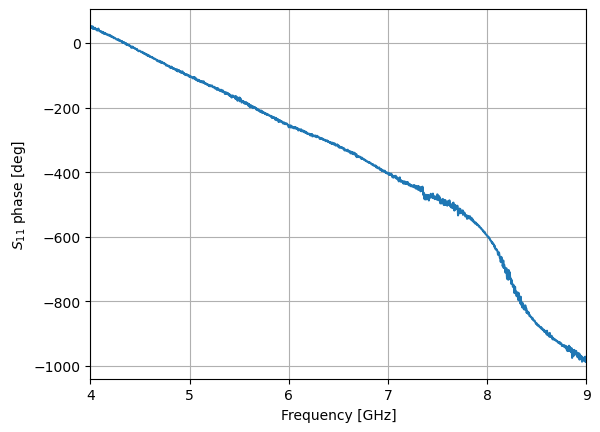

In [9]:
plt.plot(fghz,data_corrected['trace900'].s_deg_unwrap[:,0,0])
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
#plt.title('Data Corrected with Port 6 Tier 2 Ecal')

Text(0, 0.5, '$S_{11}$ phase [deg]')

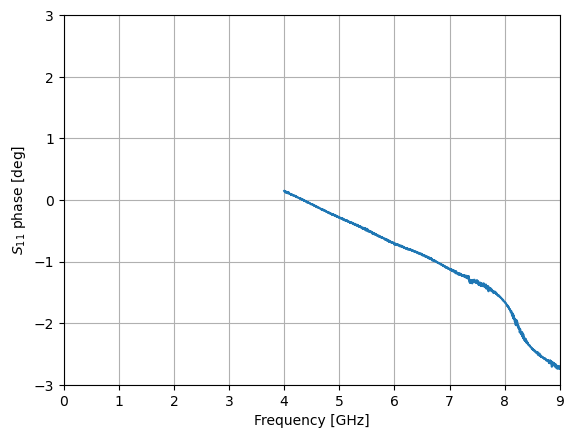

In [11]:
plt.plot(fghz,data_corrected['trace900'].s_deg_unwrap[:,0,0]/360)
plt.xlim(0,fghz[len(fghz)- 1])
plt.ylim(-3,3)
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
#plt.title('Data Corrected with Port 6 Tier 2 Ecal')

In [13]:
phasexy = []
for index in range(len(data_corrected)):
    phasexy.append(data_corrected['trace' + str(index)].s_deg_unwrap[:,0,0])
phasexy= np.array(phasexy)

In [15]:
magxy = []
for index in range(len(data_corrected)):
    magxy.append(data_corrected['trace' + str(index)].s_db[:,0,0])
magxy = np.array(magxy)
magxy = np.array(magxy)

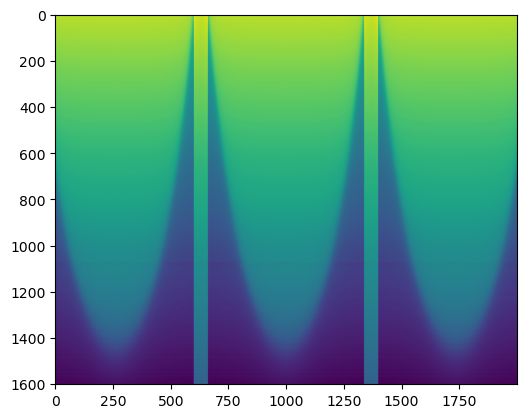

In [17]:
plt.imshow(phasexy.transpose())

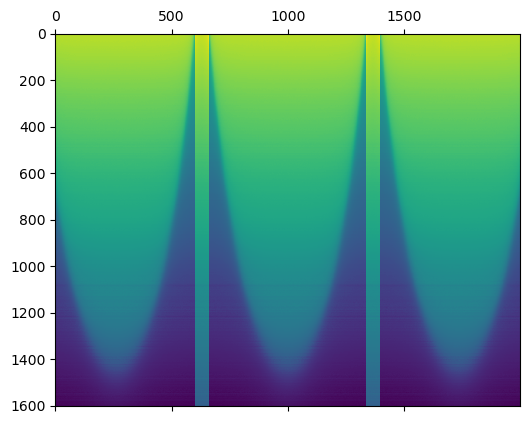

In [40]:
plt.matshow(phasexy.transpose())

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_25200\3800751732.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("Flux Bias [$\phi/\phi_0$]")


Text(0.5, 0, 'Flux Bias [$\\phi/\\phi_0$]')

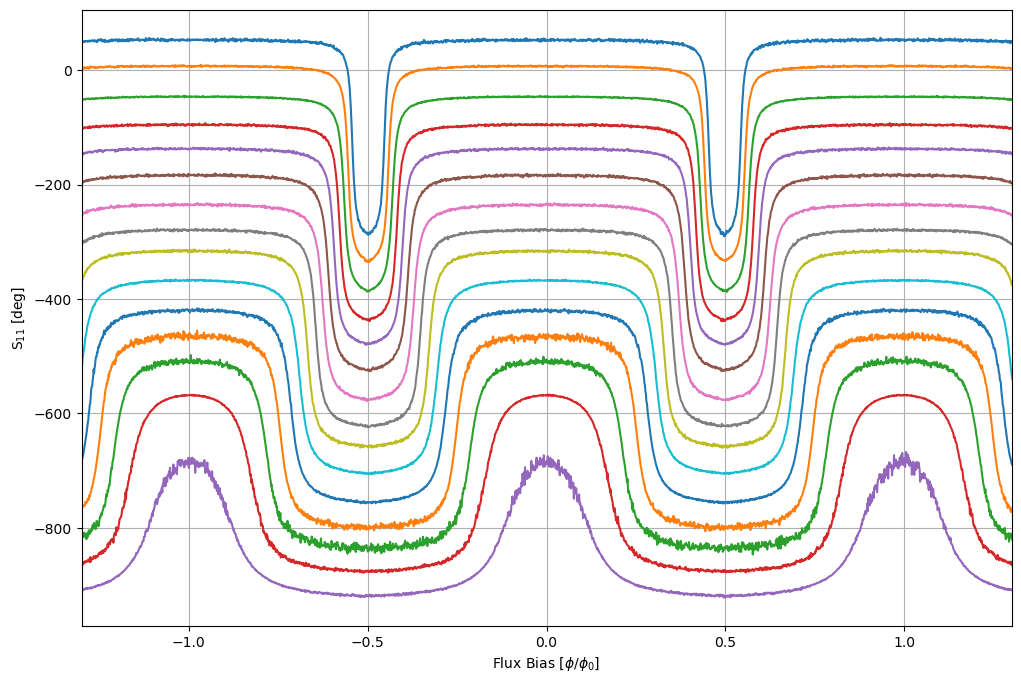

In [35]:
plt.figure(figsize=(12, 8))    
for index in range(15):
    plt.plot(biaswave/1.85,np.unwrap(phasexy.transpose()[100*index],period=360))
plt.xlim(biaswave[0],biaswave[len(biaswave) - 1])
plt.grid()
plt.xlim(-1.3,1.3)
plt.ylabel("S$_{11}$ [deg]")
plt.xlabel("Flux Bias [$\phi/\phi_0$]")

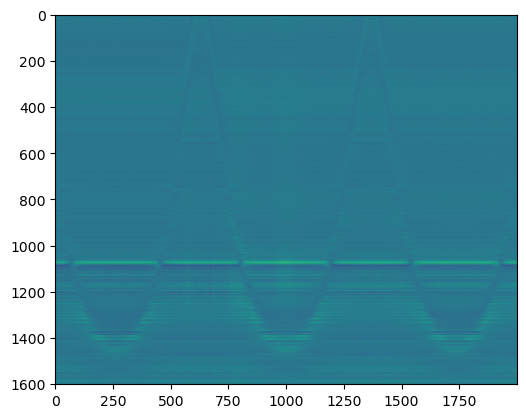

In [62]:
plt.imshow(magxy.transpose())

In [97]:
legendlist = []
plt.figure(figsize=(10, 6))    
for index in range(15):
    plt.plot(np.array(biaswave)/period,phasexy.transpose()[100*index])
    legendlist.append(str(fghz[100*index]) + " GHz")
plt.xlim(0.55,1.35)
plt.xlabel('Flux Bias [$\phi_0$]')
plt.ylabel('$S_{11} [dB]$')
plt.legend(legendlist,loc=1)
plt.grid()

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_31904\1956590872.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Flux Bias [$\phi_0$]')
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_31904\1956590872.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Flux Bias [$\phi_0$]')


NameError: name 'phasexy' is not defined

<Figure size 1000x600 with 0 Axes>

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_18948\3170731989.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Flux Bias [$\phi_0$]')


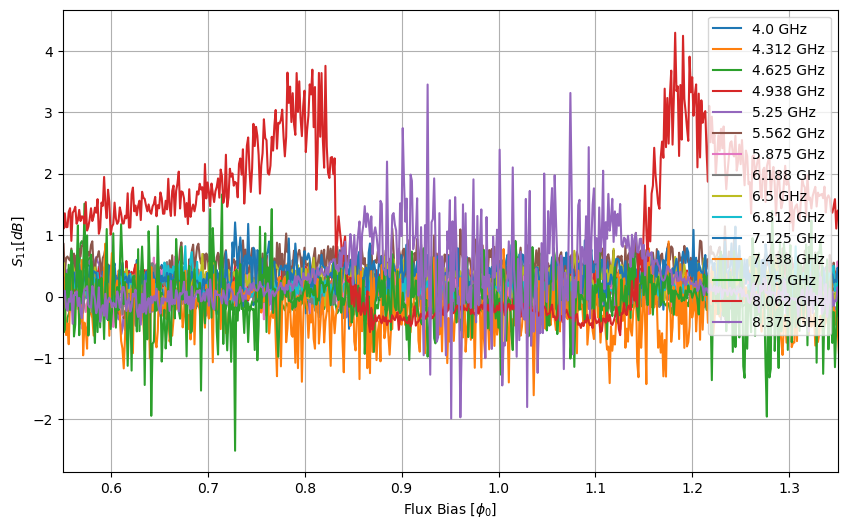

In [166]:
legendlist = []
plt.figure(figsize=(10, 6))    
for index in range(15):
    plt.plot(np.array(biaswave)/period,magxy.transpose()[100*index])
    legendlist.append(str(fghz[100*index]) + " GHz")
plt.xlim(0.55,1.35)
plt.xlabel('Flux Bias [$\phi_0$]')
plt.ylabel('$S_{11} [dB]$')
plt.legend(legendlist,loc=1)
plt.grid()

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_18948\2924565223.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Flux Bias [$\phi_0$]')


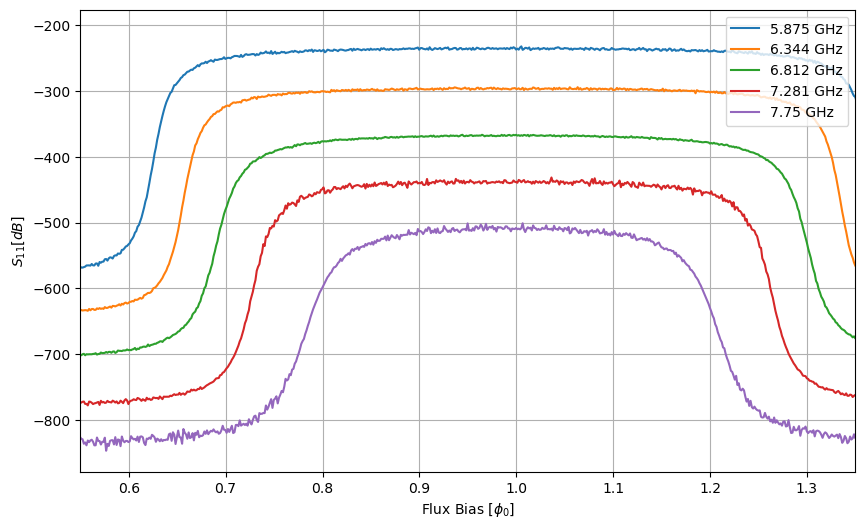

In [182]:
legendlist = []
plt.figure(figsize=(10, 6))    
for index in range(5):
    plt.plot(np.array(biaswave)/period,phasexy.transpose()[150*(index + 4)])
    legendlist.append(str(fghz[150*(index + 4)]) + " GHz")
plt.xlim(0.55,1.35)
plt.xlabel('Flux Bias [$\phi_0$]')
plt.ylabel('$S_{11} [dB]$')
plt.legend(legendlist,loc=1)
plt.grid()

In [123]:
coax_length = 0.04118391468781653
Cin = 8.147442219500046e-13
C0 = 6.122588278642505e-12
L0 = 7.850512215034593e-11
Ljmin = 2.297257447850102e-12
f = fghz*1e9
f_coax = Frequency(fghz[0], fghz[len(fghz)-1], len(fghz), 'GHz')
sopen = fghz*0j + 1
open_network = rf.Network(frequency=f, s=sopen, z0=50)
omega = 2*np.pi*f
coax = coaxial.Coaxial(f_coax,Dint=0.0005,Dout=0.001675,epsilon_r=2.1,sigma=1.2e7,z0_port=50, z0=50)
coax_section = coax.line(coax_length, unit = 'm',name='coax,')

phitheory = 0.20882460082733453

L_shunt = L0 + Ljmin/np.abs(np.cos(2*np.pi*phitheory))
Y_c_shunt = 1j*omega*C0
Y_l_shunt = 1/(1j*omega*L_shunt)
Z_c_in = 1/(1j*2*np.pi*f*Cin)
c_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_c_shunt, name='shunt_admittance')
l_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_l_shunt, name='shunt_admittance2')
cin_series_network = rf.Circuit.SeriesImpedance(f,Z_c_in,name='cin')
jpa = cin_series_network**l_shunt_network**c_shunt_network**open_network
phase =  jpa.s_deg[:,0,0]


In [ ]:
coax_length = 0.04118391468781653
Cin = 8.147442219500046e-13
C0 = 6.122588278642505e-12
L0 = 50e-12
Ljmin = 10e-12
f = fghz*1e9
f_coax = Frequency(fghz[0], fghz[len(fghz)-1], len(fghz), 'GHz')
sopen = fghz*0j + 1
open_network = rf.Network(frequency=f, s=sopen, z0=50)
omega = 2*np.pi*f
coax = coaxial.Coaxial(f_coax,Dint=0.0005,Dout=0.001675,epsilon_r=2.1,sigma=1.2e7,z0_port=50, z0=50)
coax_section = coax.line(coax_length, unit = 'm',name='coax,')

phasetheory2d = []
for phitheory in phiwave:
    L_shunt = L0 + Ljmin/np.abs(np.cos(np.pi*phitheory))
    Y_c_shunt = 1j*omega*C0
    Y_l_shunt = 1/(1j*omega*L_shunt)
    Z_c_in = 1/(1j*2*np.pi*f*Cin)
    c_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_c_shunt, name='shunt_admittance')
    l_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_l_shunt, name='shunt_admittance2')
    cin_series_network = rf.Circuit.SeriesImpedance(f,Z_c_in,name='cin')
    jpa = cin_series_network**l_shunt_network**c_shunt_network**open_network
    jpa_coax_correct = coax_section**jpa
    phase =  jpa_coax_correct.s_deg_unwrap[:,0,0]
    phasetheory2d.append(phase)
plt.imshow(phasetheory2d)
phasetheory2d = np.array(phasetheory2d)

$$ 
Z = Z_{cin} + Z_{LC}
$$
$$
Z_{cin} = \frac{1}{i\omega C_{in}}
$$

$Z_{LC}$ is the parallel combination of $Z_C = \frac{1}{i\omega C_0}$ and $Z_L = i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})$, which combine to 

$$
Z_{LC} = \frac{Z_C Z_L}{Z_C + Z_L}
$$



$$
Z_{LC} = \frac{\frac{1}{i\omega C_0} i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})}{\frac{1}{i\omega C_0} + i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})}
$$


$$
 = \frac{\frac{1}{ C_0} (L_0 + \frac{L_J}{\cos{2\pi\phi}})}{ \frac{1}{i\omega C_0} + i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}} )}\left(\frac{i\omega C_0}{i\omega C_0}\right)
$$

$$
Z_{JPA} = \frac{1}{i\omega C_{in}} +  \frac{i\omega(L_0 + \frac{L_J}{\cos{2\pi\phi}})}{1 - \omega^2C_0(L_0 + \frac{L_J}{\cos{2\pi\phi}})}
$$

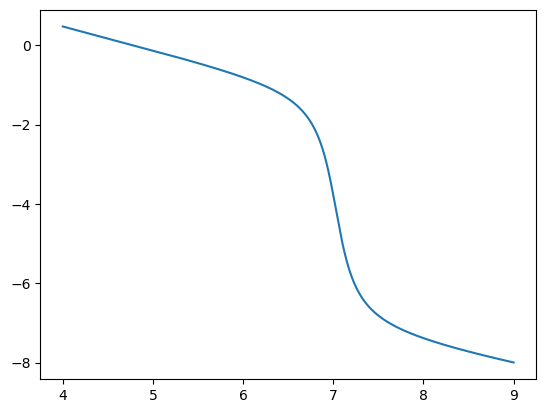

In [89]:
Cin = 0.6e-12
C0 = 6e-12
L0 = 50e-12
Lj = 10e-12
f_360 = 3e9
f = 1e9*fghz
omega = 2*np.pi*f
phi = 0.2
Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
s_jpa_unwrapped = (np.angle(phaseshift*s_jpa))  
plt.plot(fghz,np.unwrap(s_jpa_unwrapped))

<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_31904\2989412388.py:25: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Flux Bias [$\phi_0$]')


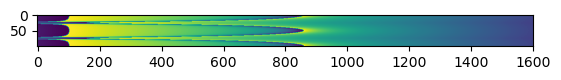

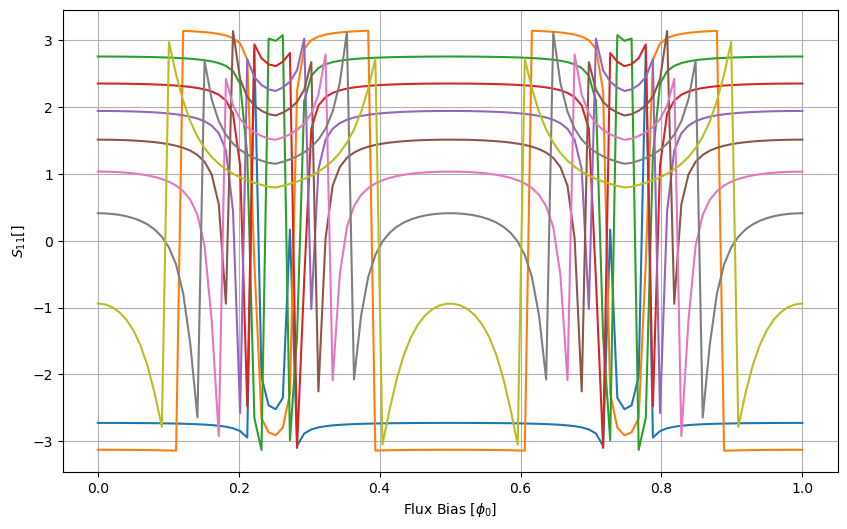

In [95]:
Cin = 1e-12
C0 = 8e-12
L0 = 50e-12
Lj = 20e-12
f_360 = 1e9
f = 1e9*fghz
omega = 2*np.pi*f
phasetheory2d = []
phiwavetheory = np.linspace(0,1,100)
for phi in np.linspace(0,1,100):
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
    s_jpa_unwrapped = (np.angle(phaseshift*s_jpa))  
    phasetheory2d.append(s_jpa_unwrapped)
phasetheory2d = np.array(phasetheory2d)
#plt.figure(figsize=(10, 10))    
plt.imshow(phasetheory2d)
legendlist = []
plt.figure(figsize=(10, 6))    
for index in range(9):
    plt.plot(phiwavetheory,phasetheory2d.transpose()[100*index])
    #legendlist.append(str(fghz[100*index]) + " GHz")
#plt.xlim(0.55,1.35)
plt.xlabel('Flux Bias [$\phi_0$]')
plt.ylabel('$S_{11} []$')
#plt.ylim(-360,0)
#plt.legend(legendlist,loc=1)
plt.grid()

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_31904\2270538140.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Flux Bias [$\phi_0$]')


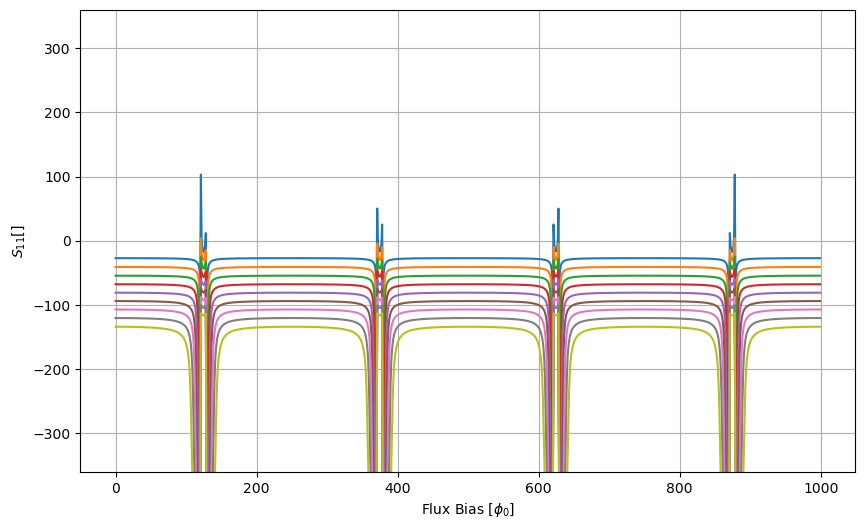

In [41]:
legendlist = []
plt.figure(figsize=(10, 6))    
for index in range(9):
    plt.plot(phasetheory2d.transpose()[100*index])
    #legendlist.append(str(fghz[100*index]) + " GHz")
#plt.xlim(0.55,1.35)
plt.xlabel('Flux Bias [$\phi_0$]')
plt.ylabel('$S_{11} []$')
plt.ylim(-360,360)
#plt.legend(legendlist,loc=1)
plt.grid()

In [75]:
phiwavetheory

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747